In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly as py

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import cufflinks as cf
cf.go_offline()
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

# Regressors considered:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,LogisticRegression # only model used for final submission
print('Libray Loaded')

Libray Loaded


In [2]:
pip install cufflinks

     |████████████████████████████████| 81 kB 2.6 MB/s eta 0:00:01
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=0b9cd651e8328b359dc999065c189469e157c3288b16a1914a4947c75be71e7c
  Stored in directory: /Users/SN/Library/Caches/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [4]:
train = pd.read_csv('data/train 2.csv')
test = pd.read_csv('data/test.csv')
train.shape,test.shape

((137, 43), (100000, 42))

In [7]:
train

Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0      0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1      1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2      2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3      3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4      4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   
..   ...         ...         ...         ...  ...  ..  ...  ...  ...  ..  ...   
132  132  06/25/2008     Trabzon       Other   FC   2  3.0  3.0  5.0   4  ...   
133  133  10/12/2006       İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   
134  134  07/08/2006     Kayseri       Other   FC   3  4.0  4.0  4.0   2  ...   
135  135  10/29/2010    İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2  ...   
136  136  09/01/2009    İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2  ...   

     P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0    3.0    5    3    4    5    5    4    3    4  5653753.0  
1    3.0    0    0    0    0    0    0    0    0  6923131.0  
2    3.0    0    0    0    0    0    0    0    0  2055379.0  
3    7.5   25   12   10    6   18   12   12    6  2675511.0  
4    3.0    5    1    3    2    3    4    3    3  4316715.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...        ...  
132  3.0    0    0    0    0    0    0    0    0  5787594.0  
133  3.0    0    0    0    0    0    0    0    0  9262754.0  
134  3.0    0    0    0    0    0    0    0    0  2544857.0  
135  3.0    0    0    0    0    0    0    0    0  7217634.0  
136  3.0    0    0    0    0    0    0    0    0  6363241.0  

[137 rows x 43 columns]

In [8]:
test

Id   Open Date            City  City Group Type  P1   P2   P3   P4  \
0          0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   
1          1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   
2          2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   
3          3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   
4          4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   
...      ...         ...             ...         ...  ...  ..  ...  ...  ...   
99995  99995  01/05/2000         Antalya       Other   FC   5  5.0  4.0  4.0   
99996  99996  07/18/2011           Niğde       Other   IL   1  2.0  4.0  3.0   
99997  99997  12/29/2012        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   
99998  99998  10/12/2013        İstanbul  Big Cities   FC  12  7.5  6.0  6.0   
99999  99999  10/05/2010        İstanbul  Big Cities   IL   2  5.0  4.0  4.0   

       P5  ...  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  
0       1  ...  2.0  3.0    0    0    0    0    0    0    0    0  
1       2  ...  1.0  3.0    0    0    0    0    0    0    0    0  
2       2  ...  2.0  3.0    0    0    0    0    0    0    0    0  
3       2  ...  2.0  3.0    0    4    0    0    0    0    0    0  
4       1  ...  5.0  3.0    0    0    0    0    0    0    0    0  
...    ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
99995   2  ...  2.0  3.0    0    0    0    0    0    0    0    0  
99996   1  ...  1.0  3.0    5    0    0    0    4    0    0    0  
99997   1  ...  4.0  1.0    5    5    3    2    4    4    4    2  
99998   4  ...  7.5  5.0    0    0    0    4    0    0    0    0  
99999   2  ...  5.0  3.0    0    2    0    2    2    4    2    0  

[100000 rows x 42 columns]

In [9]:
X = pd.concat([train,test])
X.shape

(100137, 43)

In [12]:
X.duplicated().sum()

0

NameError: name 'col' is not defined

In [14]:
cat_feature = [col for col in train.columns if train[col].dtypes == "O"]
cat_feature

['Open Date', 'City', 'City Group', 'Type']

In [19]:
num_feature = [col for col in train.columns if train[col].dtypes != "O"]
num_feature

['Id',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'revenue']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



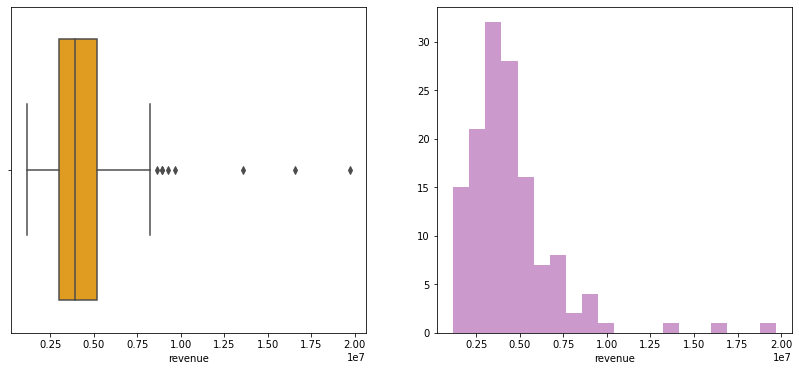

In [22]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train.revenue,color='orange')
plt.subplot(1,2,2)
sns.distplot(train.revenue, bins=20, kde=False,color='purple')
plt.show()

In [27]:
rev_stat=train.revenue.describe()
print(rev_stat)
# calculating interquartile rangeZ
iqr=rev_stat['75%']-rev_stat['25%']
upper=rev_stat['75%']+1.5*iqr
lower=rev_stat['25%']-1.5*iqr
print()
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower,upper))

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

The upper and lower bounds for suspected outliers are -252282.5 and 8417985.5


In [29]:
train[train.revenue>upper]

Id   Open Date      City  City Group Type  P1   P2   P3   P4  P5  ...  \
16    16  01/07/2000  İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2  ...   
24    24  09/20/2009  İstanbul  Big Cities   IL   5  5.0  3.0  5.0   2  ...   
49    49  04/01/2008  İstanbul  Big Cities   FC  12  7.5  6.0  6.0   2  ...   
75    75  10/15/2005  İstanbul  Big Cities   FC   5  5.0  4.0  5.0   1  ...   
99    99  12/18/1999  İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
100  100  09/21/2007  İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2  ...   
116  116  03/30/2012     İzmir  Big Cities   FC   2  4.0  4.0  4.0   2  ...   
133  133  10/12/2006     İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   

     P29  P30  P31  P32  P33  P34  P35  P36  P37     revenue  
16   2.0    0    0    0    0    0    0    0    0  19696939.0  
24   2.0    5    5    4    4    4    4    5    2   8904084.0  
49   7.5    0    0    0    0    0    0    0    0   8630682.0  
75   0.0    0    0    0    0    0    0    0    0  16549064.0  
99   1.0    5    5    4    2    5    5    5    3  13575224.0  
100  3.0    0    0    0    0    0    0    0    0   9652350.0  
116  3.0    0    0    0    0    0    0    0    0   8894598.0  
133  3.0    0    0    0    0    0    0    0    0   9262754.0  

[8 rows x 43 columns]

In [30]:
train_date=train['Open Date'].str.split('/', n = 2, expand = True)
train['month']=train_date[0]
train['days']=train_date[1]
train['year']=train_date[2]

test_date=test['Open Date'].str.split('/', n = 2, expand = True)
test['month']=test_date[0]
test['days']=test_date[1]
test['year']=test_date[2]
train['month'].head(5)

0    07
1    02
2    03
3    02
4    05
Name: month, dtype: object

In [43]:


def featureCatPlot(col):
    plt.figure(figsize=(20,5))
    i=1
    if not train[col].dtype.name=='int64' and not train[col].dtype.name=='float64':
        plt.subplot(1,2,i)
        sns.boxplot(x=col,y='revenue',data=train)
        plt.xticks(rotation=60)
        plt.ylabel('Revenue')
        i+=1 
        plt.subplot(1,2,i)
        mean=train.groupby(col)['revenue'].mean()
        level=mean.sort_values().index.tolist()
        train[col]=train[col].astype('category')
        train[col].cat.reorder_categories(level,inplace=True)
        train[col].value_counts().plot()
        plt.xticks(rotation=60)
        plt.xlabel(col)
        plt.ylabel('Counts')       
        plt.show()



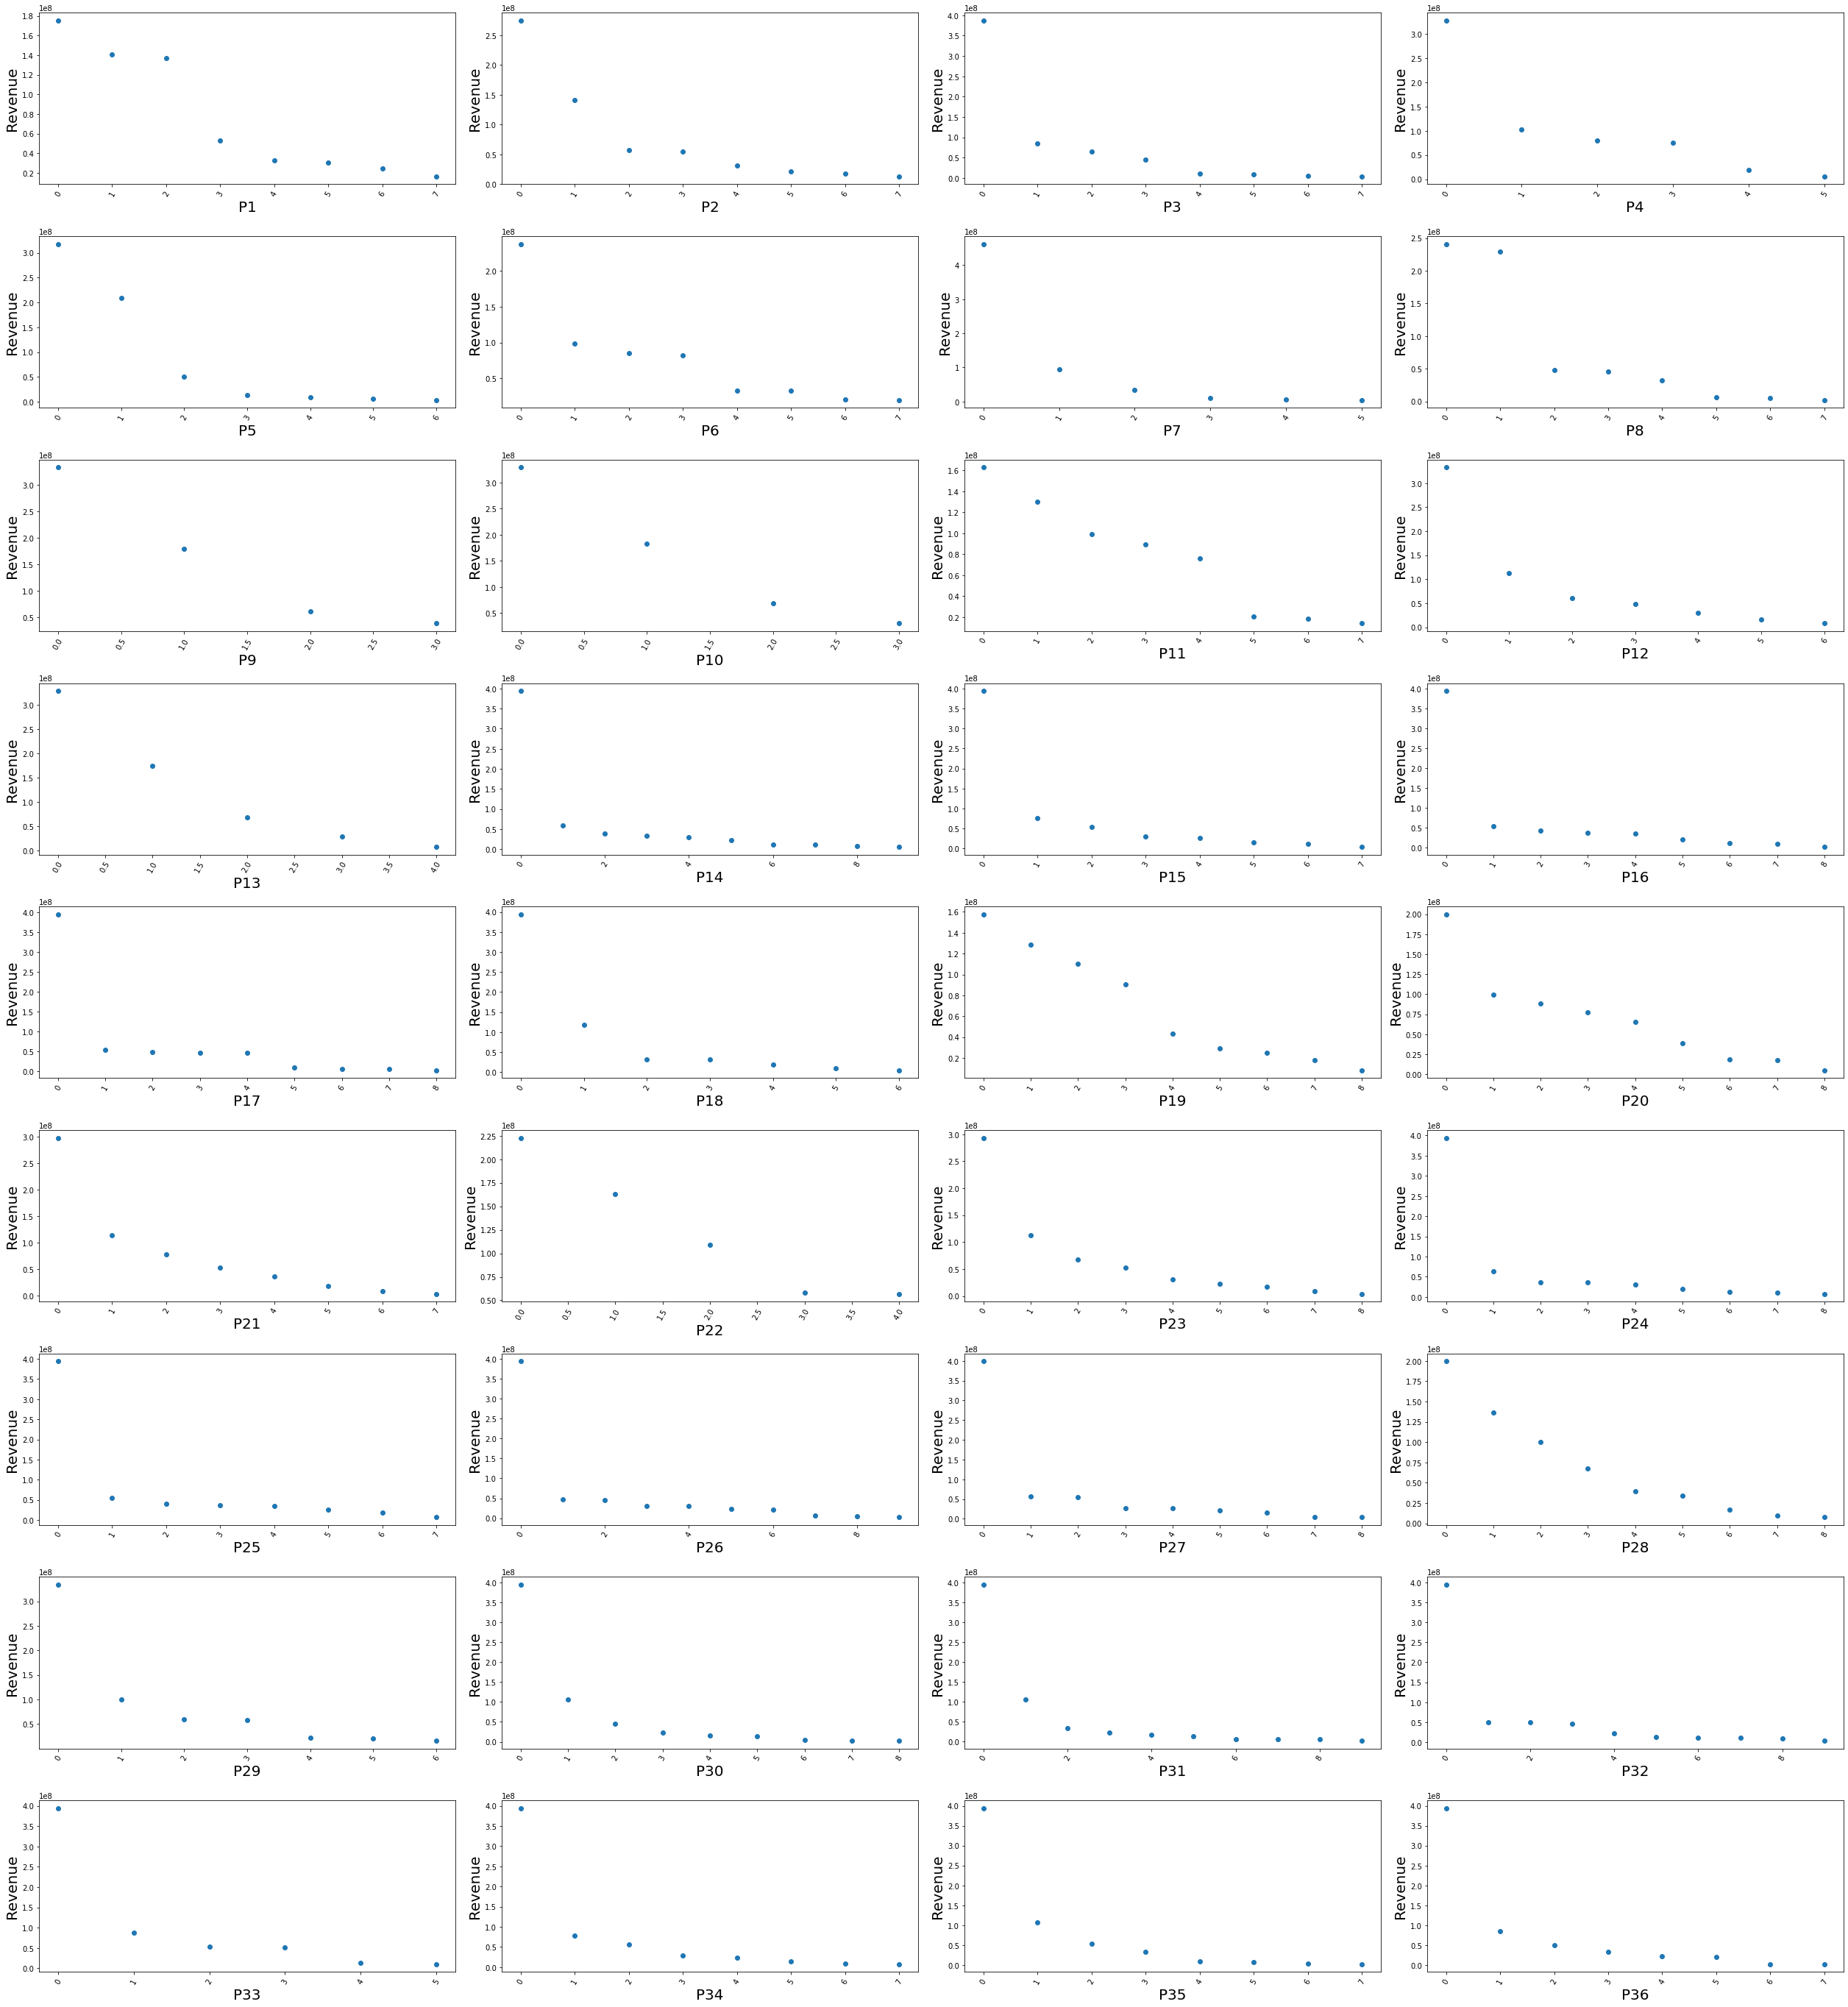

In [44]:


#  plot correlation between revenue and continuous feature
def numFeaturePlot():
    features=(train.loc[:,'P1':'P37']).columns.tolist()
    plt.figure(figsize=(35,38))
    j=1
    while j<len(features):
        col=features[j-1]
        plt.subplot(9,4,j)
        sorted_grp = train.groupby(col)["revenue"].sum().sort_values(ascending=False).reset_index()
        x_val = sorted_grp.index
        y_val = sorted_grp['revenue'].values
        plt.scatter(x_val, y_val)
        plt.xticks(rotation=60)
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Revenue', fontsize=20)
        j+=1    
    plt.tight_layout()
    plt.show()

numFeaturePlot()

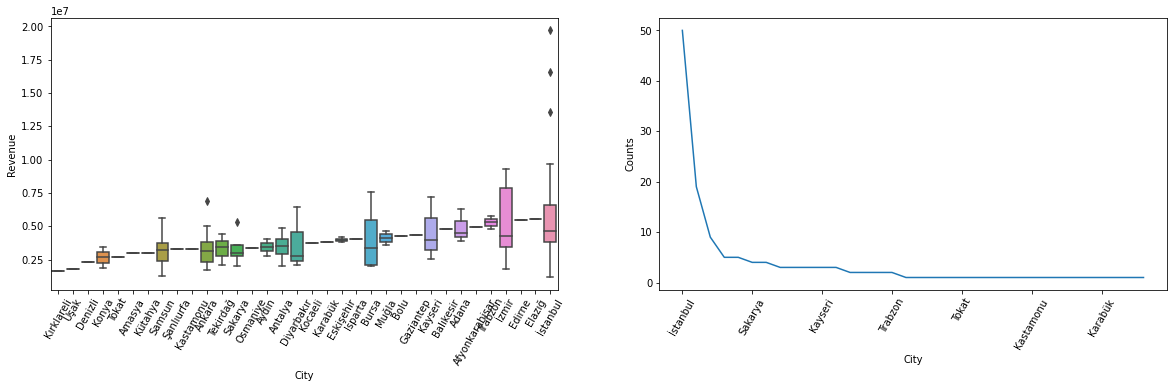

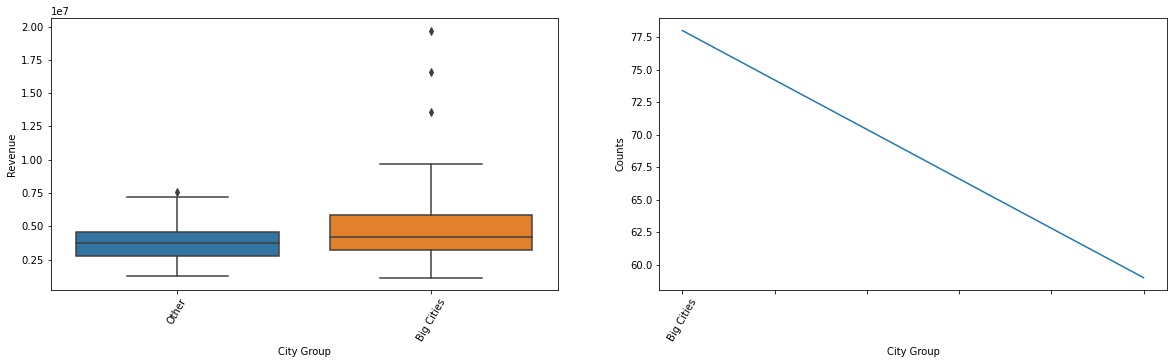

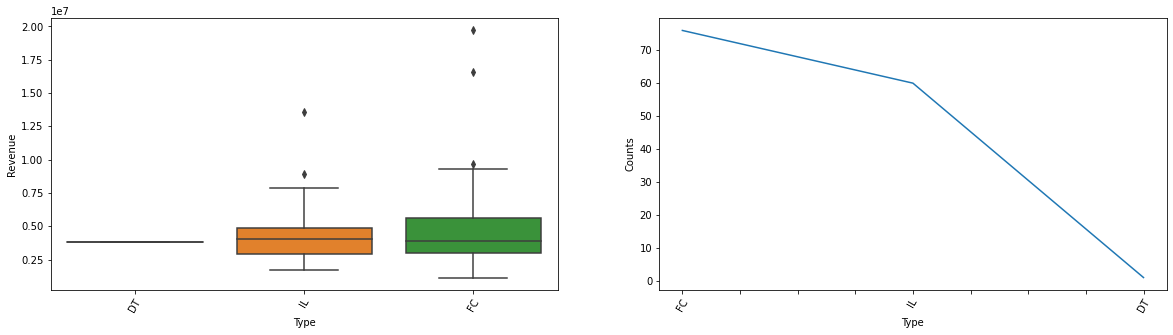

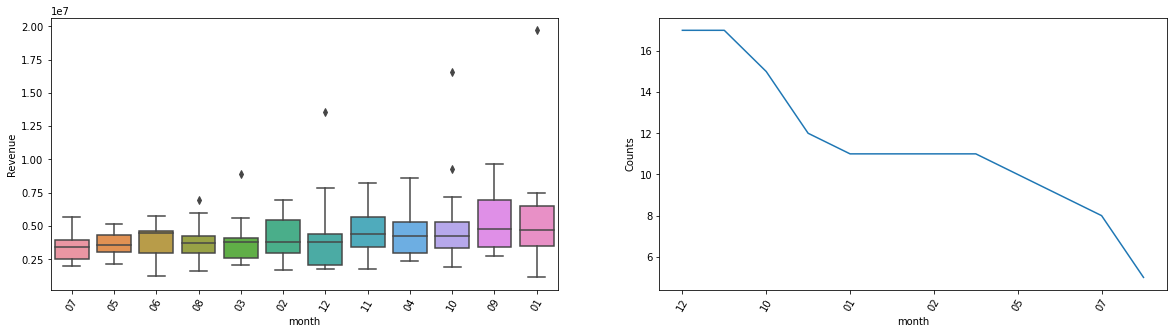

In [69]:
for feat in cat_feature:
    if feat != 'Open Date':
        featureCatPlot(feat)

featureCatPlot('month')

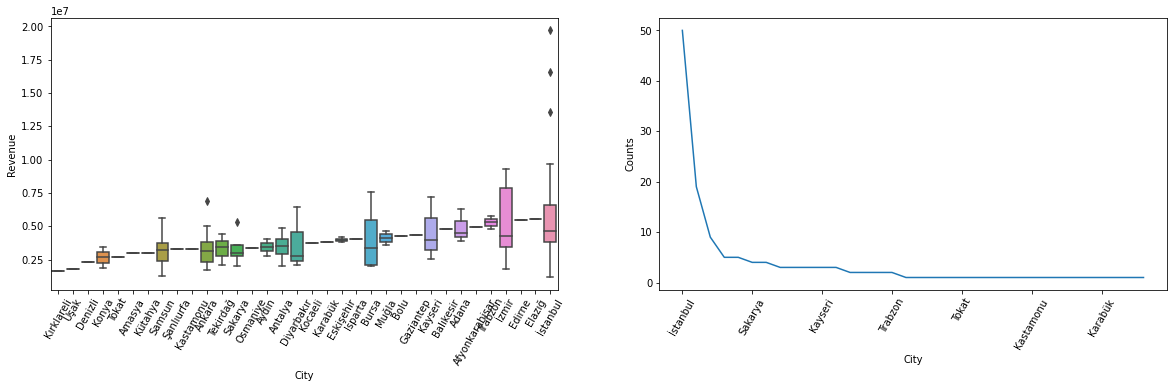

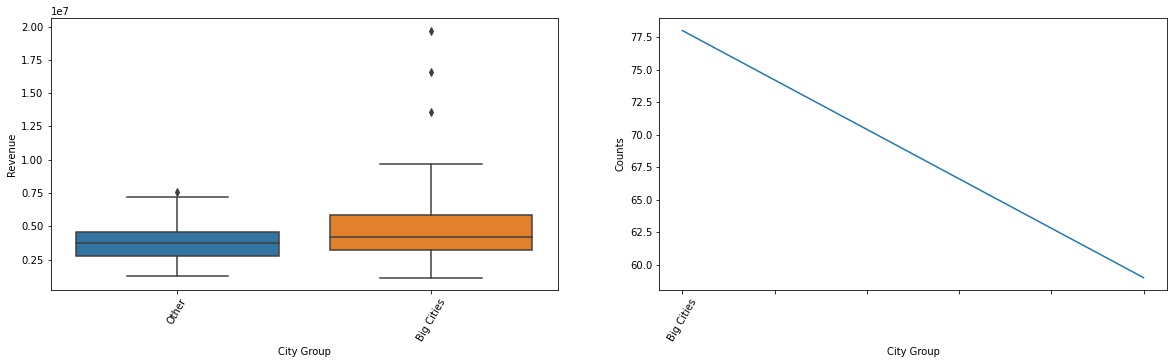

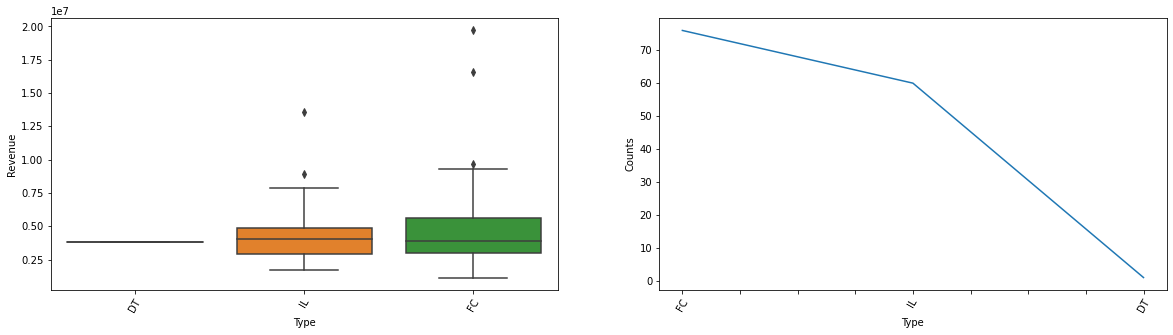

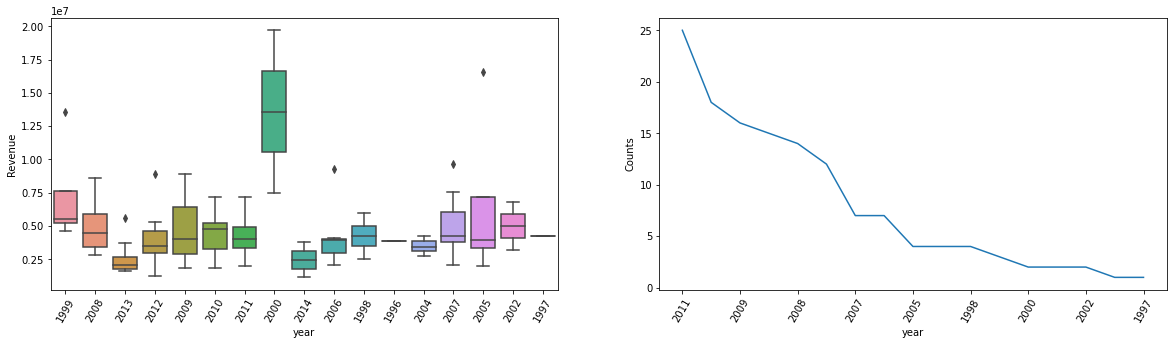

In [67]:
for feat in cat_feature:
    if feat != 'Open Date':
        featureCatPlot(feat)

featureCatPlot('year')

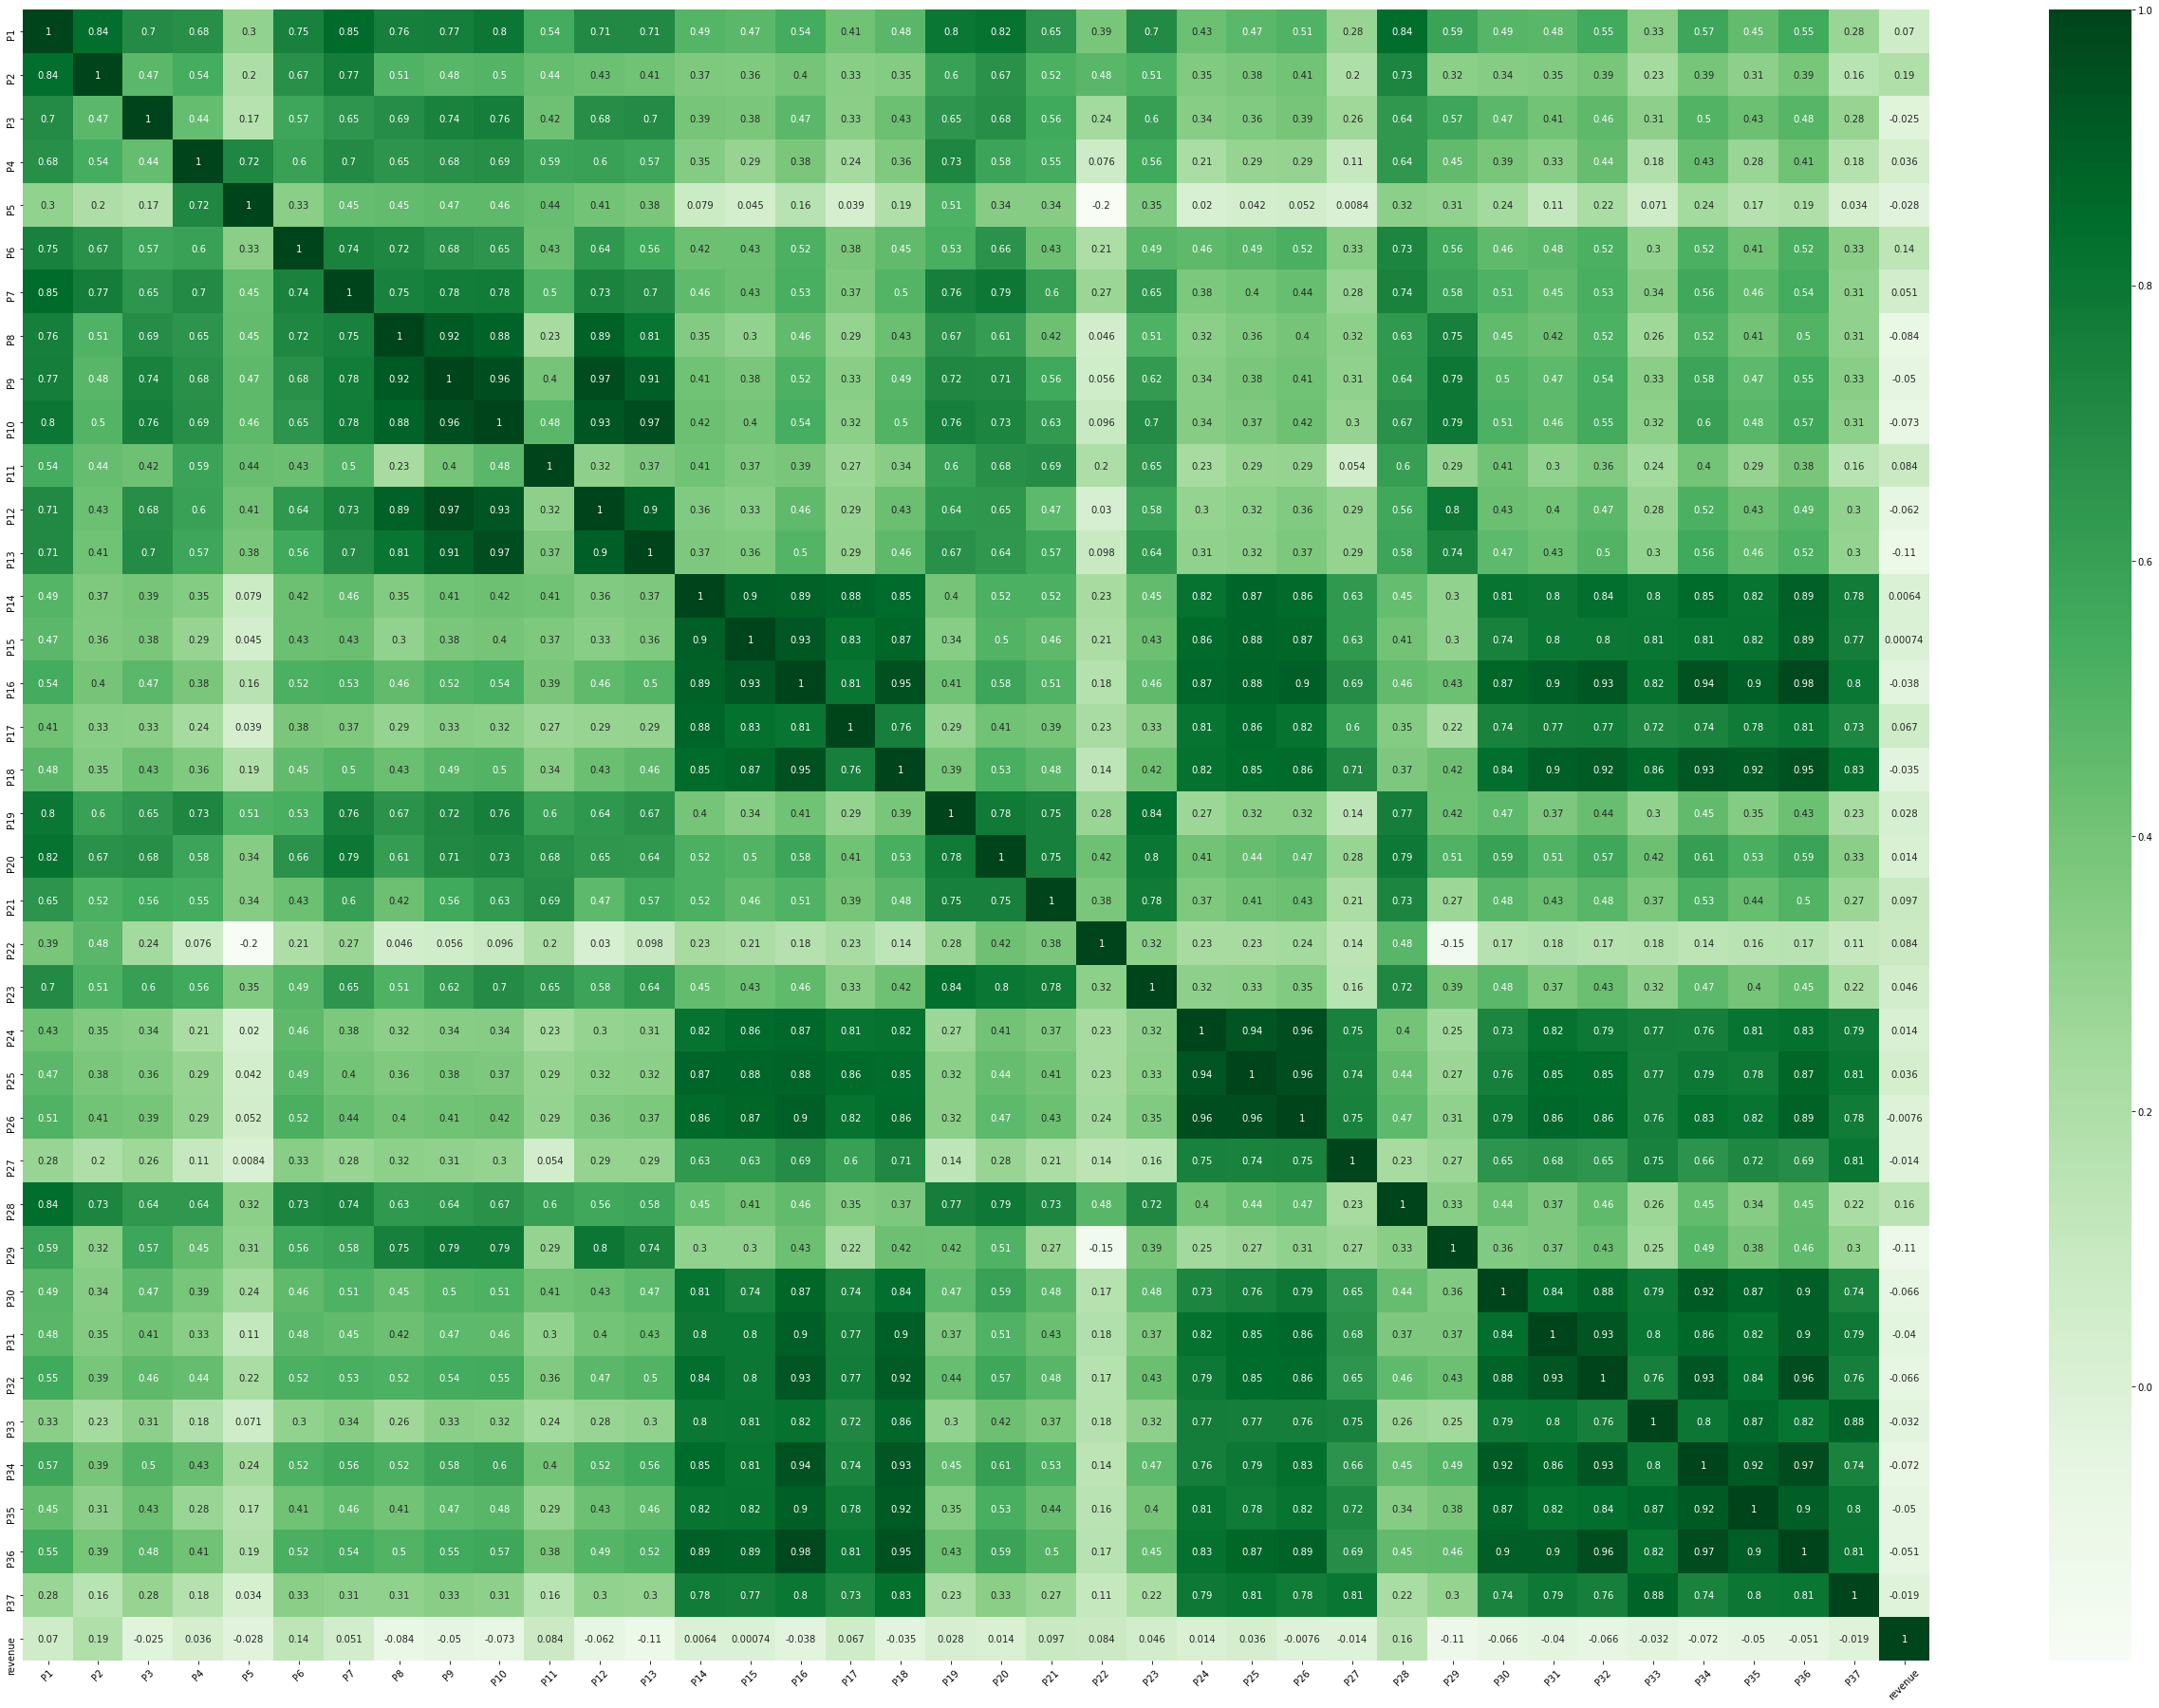

In [46]:
# Plotting heatmap between revenue and P variables
fig=plt.figure(figsize=(45,32))
features=(train.loc[:,'P1':'P37']).columns.tolist()
sns.heatmap(train[features+['revenue']].corr(),cmap='Greens',annot=True)
plt.xticks(rotation=45)
plt.show()



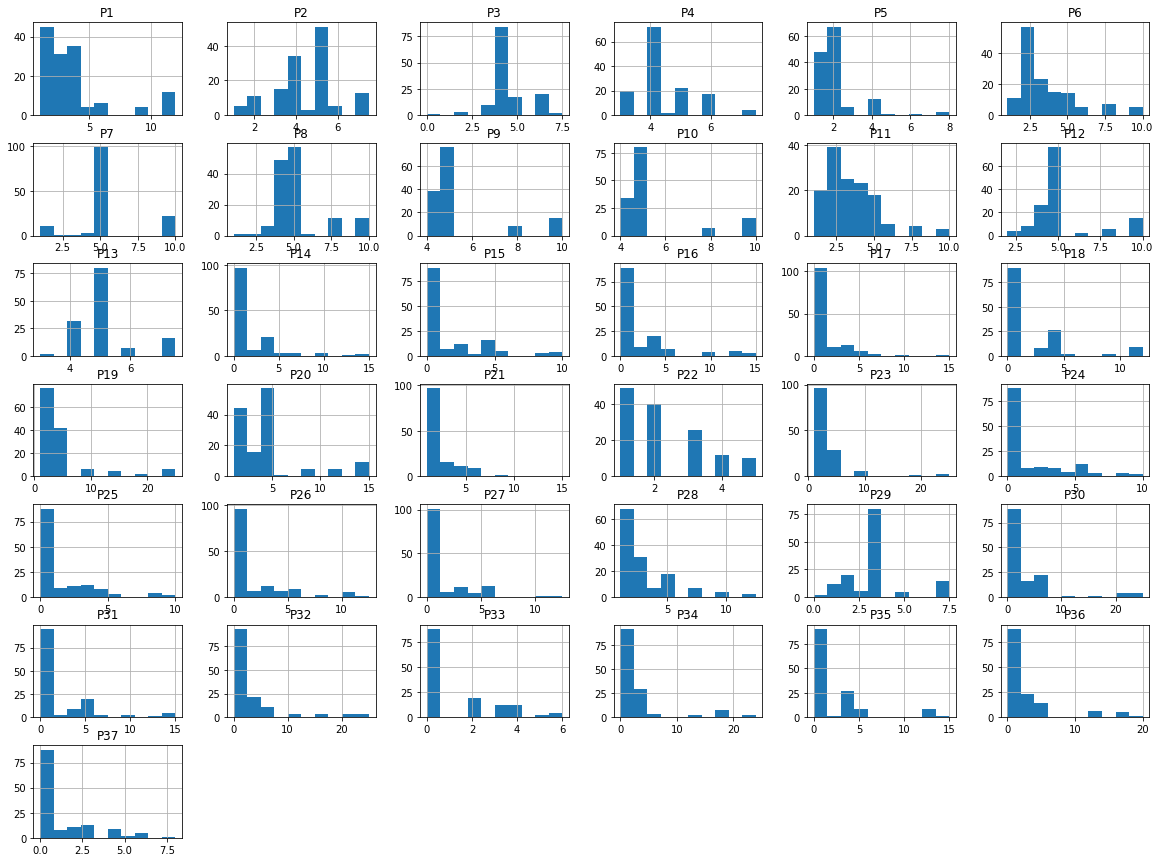

In [47]:
features=(train.loc[:,'P1':'P37']).columns.tolist()
train[features].hist(figsize=(20,15))
plt.show()

## Feature Engineering


In [58]:
import numpy as np
# Square root of the P variables
ntrain= np.sqrt(train.loc[:,'P1':'P37'])
ntest= np.sqrt(test.loc[:,'P1':'P37'])

col_train = ntrain.columns
col_test = ntest.columns
ntrain.head()

P1        P2        P3        P4        P5        P6        P7  \
0  2.000000  2.236068  2.000000  2.000000  1.414214  1.414214  2.236068   
1  2.000000  2.236068  2.000000  2.000000  1.000000  1.414214  2.236068   
2  1.414214  2.000000  1.414214  2.236068  1.414214  1.732051  2.236068   
3  2.449490  2.121320  2.449490  2.449490  2.000000  2.000000  3.162278   
4  1.732051  2.000000  1.732051  2.000000  1.414214  1.414214  2.236068   

         P8        P9       P10  ...       P28       P29       P30       P31  \
0  2.000000  2.236068  2.236068  ...  1.414214  1.732051  2.236068  1.732051   
1  2.236068  2.236068  2.236068  ...  1.732051  1.732051  0.000000  0.000000   
2  2.236068  2.236068  2.236068  ...  1.000000  1.732051  0.000000  0.000000   
3  2.828427  3.162278  3.162278  ...  1.581139  2.738613  5.000000  3.464102   
4  2.236068  2.236068  2.236068  ...  1.000000  1.732051  2.236068  1.000000   

        P32       P33       P34       P35       P36       P37  
0  2.000000  2.236068  2.236068  2.000000  1.732051  2.000000  
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3  3.162278  2.449490  4.242641  3.464102  3.464102  2.449490  
4  1.732051  1.414214  1.732051  2.000000  1.732051  1.732051  

[5 rows x 37 columns]

In [59]:
from sklearn.preprocessing import StandardScaler
SS =StandardScaler()

ntrain = SS.fit_transform(ntrain)
ntest = SS.fit_transform(ntest)

ntrain= pd.DataFrame(ntrain,columns=col_train)
ntest= pd.DataFrame(ntest,columns=col_test)

ntrain.head()

P1        P2        P3        P4        P5        P6        P7  \
0  0.154045  0.446850 -0.201271 -0.333476  0.124617 -0.654496 -0.067010   
1  0.154045  0.446850 -0.201271 -0.333476 -1.005005 -0.654496 -0.067010   
2 -0.783627 -0.166776 -2.238525  0.677030  0.124617 -0.046356 -0.067010   
3  0.873546  0.148580  1.361969  1.590598  1.722145  0.466330  1.724665   
4 -0.274863 -0.166776 -1.133147 -0.333476  0.124617 -0.654496 -0.067010   

         P8        P9       P10  ...       P28       P29       P30       P31  \
0 -0.626121 -0.199544 -0.225338  ... -0.517620  0.050993  0.959953  0.823025   
1 -0.005152 -0.199544 -0.225338  ...  0.048149  0.050993 -0.666273 -0.680541   
2 -0.005152 -0.199544 -0.225338  ... -1.254944  0.050993 -0.666273 -0.680541   
3  1.553030  2.421213  2.388412  ... -0.220484  2.213252  2.970080  2.326591   
4 -0.005152 -0.199544 -0.225338  ... -1.254944  0.050993  0.959953  0.187543   

        P32       P33       P34       P35       P36       P37  
0  0.848783  1.863596  1.039680  1.013553  0.728835  1.610808  
1 -0.657091 -0.726484 -0.653264 -0.701287 -0.678804 -0.707522  
2 -0.657091 -0.726484 -0.653264 -0.701287 -0.678804 -0.707522  
3  1.723905  2.110807  2.558871  2.268904  2.136474  2.131841  
4  0.647034  0.911627  0.658085  1.013553  0.728835  1.300210  

[5 rows x 37 columns]

In [63]:
train[train.columns[train.columns.isin(['Id', 'City', 'City Group', 'Type'])]]

Id        City  City Group Type
0      0    İstanbul  Big Cities   IL
1      1      Ankara  Big Cities   FC
2      2  Diyarbakır       Other   IL
3      3       Tokat       Other   IL
4      4   Gaziantep       Other   IL
..   ...         ...         ...  ...
132  132     Trabzon       Other   FC
133  133       İzmir  Big Cities   FC
134  134     Kayseri       Other   FC
135  135    İstanbul  Big Cities   FC
136  136    İstanbul  Big Cities   FC

[137 rows x 4 columns]

In [60]:


train = train[train.columns[train.columns.isin(['Id','City','City Group','Type','month','days','year','revenue'])]]
train = pd.concat([train,ntrain],axis=1)
test = test[test.columns[test.columns.isin(['Id','City','City Group','Type','month','days','year'])]]
test = pd.concat([test,ntest],axis=1)
train.head(5)



Id        City  City Group Type    revenue month days  year        P1  \
0   0    İstanbul  Big Cities   IL  5653753.0    07   17  1999  0.154045   
1   1      Ankara  Big Cities   FC  6923131.0    02   14  2008  0.154045   
2   2  Diyarbakır       Other   IL  2055379.0    03   09  2013 -0.783627   
3   3       Tokat       Other   IL  2675511.0    02   02  2012  0.873546   
4   4   Gaziantep       Other   IL  4316715.0    05   09  2009 -0.274863   

         P2  ...       P28       P29       P30       P31       P32       P33  \
0  0.446850  ... -0.517620  0.050993  0.959953  0.823025  0.848783  1.863596   
1  0.446850  ...  0.048149  0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
2 -0.166776  ... -1.254944  0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
3  0.148580  ... -0.220484  2.213252  2.970080  2.326591  1.723905  2.110807   
4 -0.166776  ... -1.254944  0.050993  0.959953  0.187543  0.647034  0.911627   

        P34       P35       P36       P37  
0  1.039680  1.013553  0.728835  1.610808  
1 -0.653264 -0.701287 -0.678804 -0.707522  
2 -0.653264 -0.701287 -0.678804 -0.707522  
3  2.558871  2.268904  2.136474  2.131841  
4  0.658085  1.013553  0.728835  1.300210  

[5 rows x 45 columns]

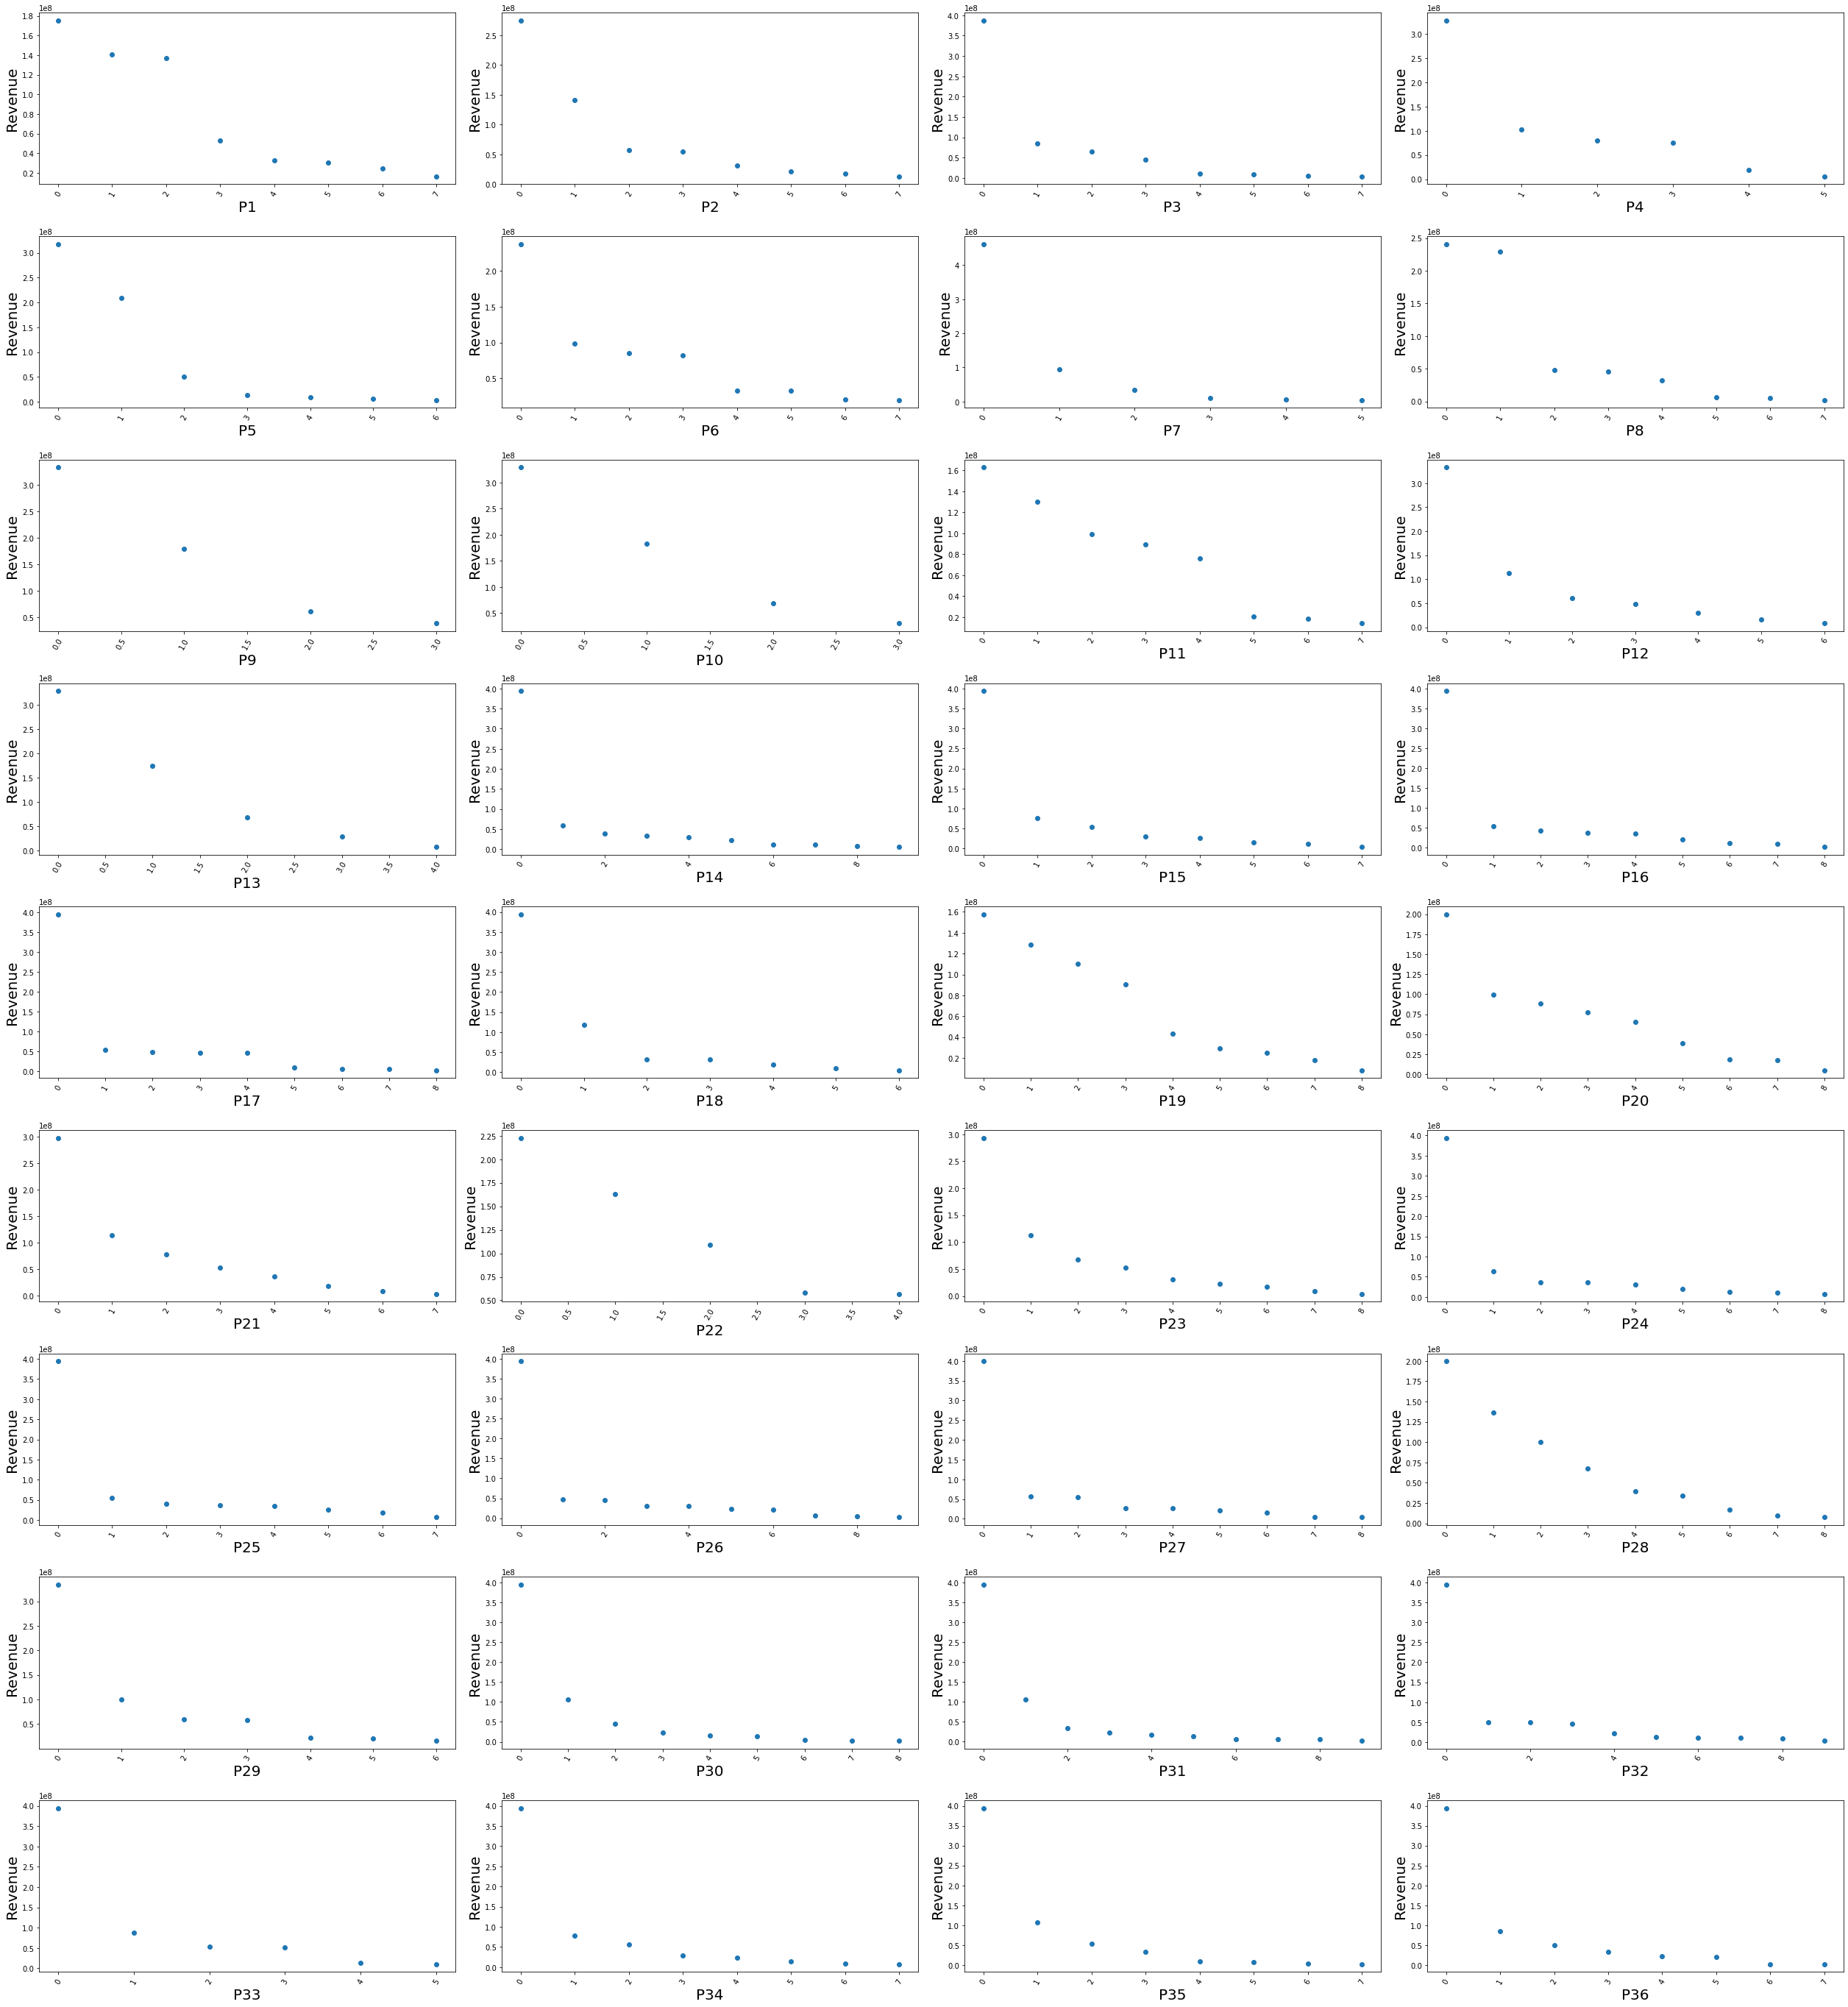

In [64]:
numFeaturePlot()



In [ ]:
features = (train.loc[:, 'P1':'P2'])

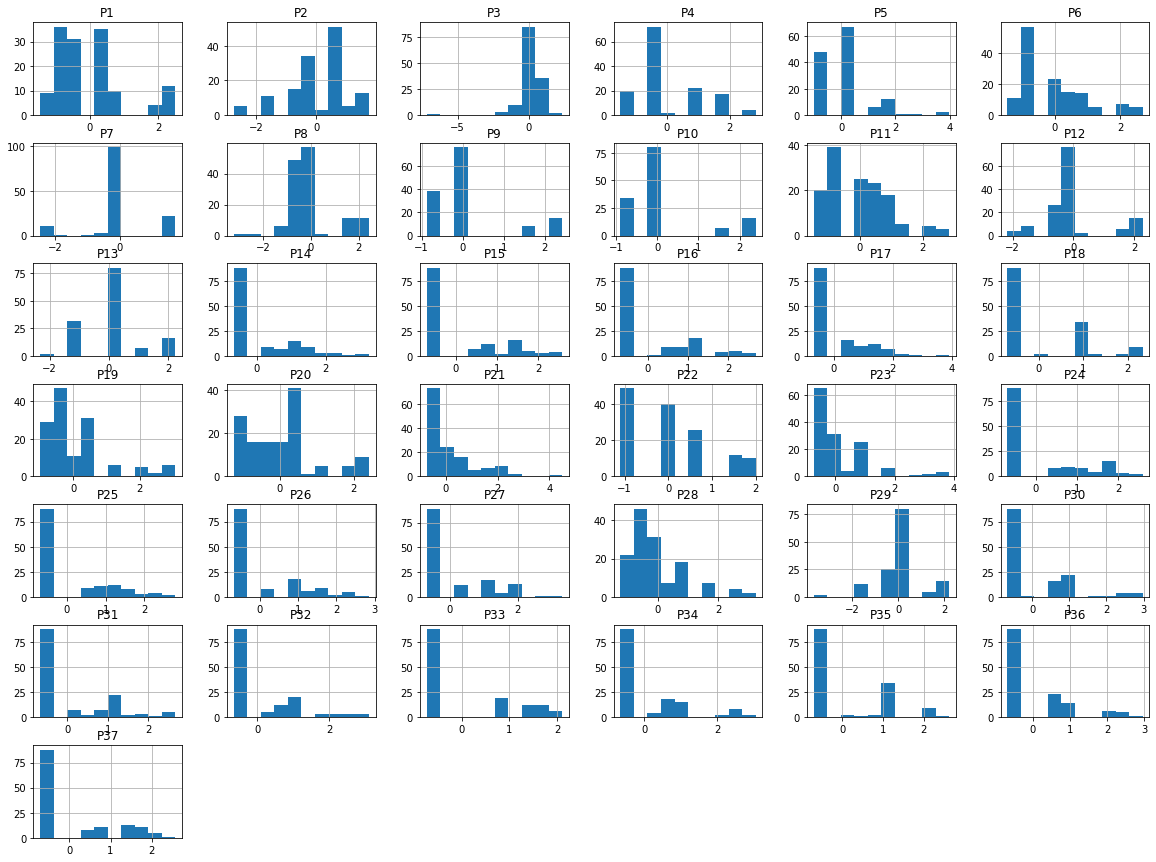

In [65]:
features=(train.loc[:,'P1':'P37']).columns.tolist()
train[features].hist(figsize=(20,15))
plt.show()

In [73]:
train.groupby('City')['revenue'].agg(['size', 'count', 'min', 'max', 'mean']).sort_values(by='mean')

size  count        min         max          mean
City                                                            
Kırklareli         1      1  1619683.0   1619683.0  1.619683e+06
Uşak               1      1  1763231.0   1763231.0  1.763231e+06
Denizli            1      1  2344689.0   2344689.0  2.344689e+06
Konya              2      2  1882131.0   3452382.0  2.667256e+06
Tokat              1      1  2675511.0   2675511.0  2.675511e+06
Amasya             1      1  2954086.0   2954086.0  2.954086e+06
Kütahya            1      1  2993069.0   2993069.0  2.993069e+06
Samsun             5      5  1270499.0   5595267.0  3.247870e+06
Şanlıurfa          1      1  3261924.0   3261924.0  3.261924e+06
Kastamonu          1      1  3273041.0   3273041.0  3.273041e+06
Ankara            19     19  1734634.0   6923131.0  3.275406e+06
Tekirdağ           3      3  2097022.0   4429512.0  3.312471e+06
Sakarya            4      4  2021934.0   5286212.0  3.328853e+06
Osmaniye           1      1  3376145.0   3376145.0  3.376145e+06
Aydın              2      2  2792031.0   4067566.0  3.429798e+06
Antalya            4      4  2025297.0   4888774.0  3.481448e+06
Diyarbakır         3      3  2055379.0   6412623.0  3.735351e+06
Kocaeli            1      1  3745135.0   3745135.0  3.745135e+06
Karabük            1      1  3807496.0   3807496.0  3.807496e+06
Eskişehir          3      3  3778621.0   4155435.0  3.957953e+06
Isparta            1      1  4015749.0   4015749.0  4.015749e+06
Bursa              5      5  1999097.0   7592272.0  4.092295e+06
Muğla              2      2  3570392.0   4651866.0  4.111129e+06
Bolu               1      1  4263629.0   4263629.0  4.263629e+06
Gaziantep          1      1  4316715.0   4316715.0  4.316715e+06
Kayseri            3      3  2544857.0   7201784.0  4.567576e+06
Balıkesir          1      1  4758476.0   4758476.0  4.758476e+06
Adana              3      3  3903884.0   6313221.0  4.894944e+06
Afyonkarahisar     1      1  4952497.0   4952497.0  4.952497e+06
Trabzon            2      2  4780607.0   5787594.0  5.284100e+06
İzmir              9      9  1756069.0   9262754.0  5.287571e+06
Edirne             1      1  5444227.0   5444227.0  5.444227e+06
Elazığ             1      1  5525735.0   5525735.0  5.525735e+06
İstanbul          50     50  1149870.0  19696939.0  5.577812e+06

In [74]:
city

no. of rows  rows with revenue        min         max  \
City                                                                    
İstanbul                 50                 50  1149870.0  19696939.0   
Elazığ                    1                  1  5525735.0   5525735.0   
Edirne                    1                  1  5444227.0   5444227.0   
İzmir                     9                  9  1756069.0   9262754.0   
Trabzon                   2                  2  4780607.0   5787594.0   
Afyonkarahisar            1                  1  4952497.0   4952497.0   
Adana                     3                  3  3903884.0   6313221.0   
Balıkesir                 1                  1  4758476.0   4758476.0   
Kayseri                   3                  3  2544857.0   7201784.0   
Gaziantep                 1                  1  4316715.0   4316715.0   
Bolu                      1                  1  4263629.0   4263629.0   
Muğla                     2                  2  3570392.0   4651866.0   
Bursa                     5                  5  1999097.0   7592272.0   
Isparta                   1                  1  4015749.0   4015749.0   
Eskişehir                 3                  3  3778621.0   4155435.0   
Karabük                   1                  1  3807496.0   3807496.0   
Kocaeli                   1                  1  3745135.0   3745135.0   
Diyarbakır                3                  3  2055379.0   6412623.0   
Antalya                   4                  4  2025297.0   4888774.0   
Aydın                     2                  2  2792031.0   4067566.0   
Osmaniye                  1                  1  3376145.0   3376145.0   
Sakarya                   4                  4  2021934.0   5286212.0   
Tekirdağ                  3                  3  2097022.0   4429512.0   
Ankara                   19                 19  1734634.0   6923131.0   
Kastamonu                 1                  1  3273041.0   3273041.0   
Şanlıurfa                 1                  1  3261924.0   3261924.0   
Samsun                    5                  5  1270499.0   5595267.0   
Kütahya                   1                  1  2993069.0   2993069.0   
Amasya                    1                  1  2954086.0   2954086.0   
Tokat                     1                  1  2675511.0   2675511.0   
Konya                     2                  2  1882131.0   3452382.0   
Denizli                   1                  1  2344689.0   2344689.0   
Uşak                      1                  1  1763231.0   1763231.0   
Kırklareli                1                  1  1619683.0   1619683.0   

                average revenue  
City                             
İstanbul           5.577812e+06  
Elazığ             5.525735e+06  
Edirne             5.444227e+06  
İzmir              5.287571e+06  
Trabzon            5.284100e+06  
Afyonkarahisar     4.952497e+06  
Adana              4.894944e+06  
Balıkesir          4.758476e+06  
Kayseri            4.567576e+06  
Gaziantep          4.316715e+06  
Bolu               4.263629e+06  
Muğla              4.111129e+06  
Bursa              4.092295e+06  
Isparta            4.015749e+06  
Eskişehir          3.957953e+06  
Karabük            3.807496e+06  
Kocaeli            3.745135e+06  
Diyarbakır         3.735351e+06  
Antalya            3.481448e+06  
Aydın              3.429798e+06  
Osmaniye           3.376145e+06  
Sakarya            3.328853e+06  
Tekirdağ           3.312471e+06  
Ankara             3.275406e+06  
Kastamonu          3.273041e+06  
Şanlıurfa          3.261924e+06  
Samsun             3.247870e+06  
Kütahya            2.993069e+06  
Amasya             2.954086e+06  
Tokat              2.675511e+06  
Konya              2.667256e+06  
Denizli            2.344689e+06  
Uşak               1.763231e+06  
Kırklareli         1.619683e+06

In [77]:
fff = city.index[:10]
fff

CategoricalIndex(['İstanbul', 'Elazığ', 'Edirne', 'İzmir', 'Trabzon',
                  'Afyonkarahisar', 'Adana', 'Balıkesir', 'Kayseri',
                  'Gaziantep'],
                 categories=['Kırklareli', 'Uşak', 'Denizli', 'Konya', 'Tokat', 'Amasya', 'Kütahya', 'Samsun', ...], ordered=False, name='City', dtype='category')

In [66]:
city = train.groupby('City')['revenue'].agg(['size','count','min','max','mean']).sort_values(by='mean',ascending = False)
city.columns = ['no. of rows','rows with revenue','min','max','average revenue']

x = city.index[:10]
city_x = [x * 1.0 for x, _ in enumerate(x)]
y_tr = city['no. of rows'][:10]
y_rr = city['rows with revenue'][:10]
y_min = city['min'][:10]
y_max = city['max'][:10]
y_avgr = city['average revenue'][:10]
city.head(10)



no. of rows  rows with revenue        min         max  \
City                                                                    
İstanbul                 50                 50  1149870.0  19696939.0   
Elazığ                    1                  1  5525735.0   5525735.0   
Edirne                    1                  1  5444227.0   5444227.0   
İzmir                     9                  9  1756069.0   9262754.0   
Trabzon                   2                  2  4780607.0   5787594.0   
Afyonkarahisar            1                  1  4952497.0   4952497.0   
Adana                     3                  3  3903884.0   6313221.0   
Balıkesir                 1                  1  4758476.0   4758476.0   
Kayseri                   3                  3  2544857.0   7201784.0   
Gaziantep                 1                  1  4316715.0   4316715.0   

                average revenue  
City                             
İstanbul           5.577812e+06  
Elazığ             5.525735e+06  
Edirne             5.444227e+06  
İzmir              5.287571e+06  
Trabzon            5.284100e+06  
Afyonkarahisar     4.952497e+06  
Adana              4.894944e+06  
Balıkesir          4.758476e+06  
Kayseri            4.567576e+06  
Gaziantep          4.316715e+06

## Model training  and Evaluate 

In [78]:


y_train = train['revenue']  #train target variable
x_train = train.drop(columns=['revenue'],axis=1)  #train features to be fit in model
x_test =test  #test features

x_train.head()

Id        City  City Group Type month days  year        P1        P2  \
0   0    İstanbul  Big Cities   IL    07   17  1999  0.154045  0.446850   
1   1      Ankara  Big Cities   FC    02   14  2008  0.154045  0.446850   
2   2  Diyarbakır       Other   IL    03   09  2013 -0.783627 -0.166776   
3   3       Tokat       Other   IL    02   02  2012  0.873546  0.148580   
4   4   Gaziantep       Other   IL    05   09  2009 -0.274863 -0.166776   

         P3  ...       P28       P29       P30       P31       P32       P33  \
0 -0.201271  ... -0.517620  0.050993  0.959953  0.823025  0.848783  1.863596   
1 -0.201271  ...  0.048149  0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
2 -2.238525  ... -1.254944  0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
3  1.361969  ... -0.220484  2.213252  2.970080  2.326591  1.723905  2.110807   
4 -1.133147  ... -1.254944  0.050993  0.959953  0.187543  0.647034  0.911627   

        P34       P35       P36       P37  
0  1.039680  1.013553  0.728835  1.610808  
1 -0.653264 -0.701287 -0.678804 -0.707522  
2 -0.653264 -0.701287 -0.678804 -0.707522  
3  2.558871  2.268904  2.136474  2.131841  
4  0.658085  1.013553  0.728835  1.300210  

[5 rows x 44 columns]

In [79]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

le =LabelEncoder()
for col in x_train.columns:
    if ((x_train[col].dtype.name == 'object') or (x_train[col].dtype.name == 'category')):
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.fit_transform(x_test[col])

        
        

In [80]:
test_label=pd.read_csv('data/sampleSubmission.csv')  # test target
test_label.head(10)

Id  Prediction
0   0   4453532.6
1   1   4453532.6
2   2   4453532.6
3   3   4453532.6
4   4   4453532.6
5   5   4453532.6
6   6   4453532.6
7   7   4453532.6
8   8   4453532.6
9   9   4453532.6

In [ ]:
grid = GridSearchCV(
estimator=algorithm,
paraa_grid = gridSearchParams,
cv=cv, verbose=1, n_jobs=-1)
grid = grid.fit(x_train_L, y_train_L)

best_params = grid_result.best
pred = grid.predict(X_test_L)

label_list = test_label['Prediction'].tolist()


In [81]:
# Functionalize model fittting
from math import sqrt
mse_list=dict()
gpred=[]

def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    global gpred
    np.random.seed(10)
    x_train_L,x_test_L,y_train_L,y_test_L = train_test_split(X,Y, test_size = 0.05)
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv,  verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(x_train_L, y_train_L)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test_L)
    
   # metrics =grid_result.gr
    #print(pred)
    #pickle.dump(grid_result,open(algo_name,'wb'))
    label_list=test_label['Prediction'].tolist()
    

    print('Best Params :',best_params)
    print('Root Mean squared error {}'.format(sqrt(mean_squared_error(y_test_L, pred))))
    
    pred_test = grid_result.predict(x_test)
    gpred= pred_test
    diff = label_list - pred_test
    res_df = pd.concat([pd.Series(pred_test),pd.Series(label_list),pd.Series(diff)],axis=1)
    res_df.columns = ['Prediction','Original Data','Diff']
    print()
    print('******************** MSE BASED on ORIGINAL TEST DATA **************************')
    print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, pred_test))))
    mse_list[algo_name]=sqrt(mean_squared_error(label_list, pred_test))
    print('******************** Prediction vs ORIGINAL TEST DATA **************************')
    print(res_df.head())

    
pd.options.display.float_format = '{:.2f}'.format

In [82]:
# random forest
param ={
            'n_estimators': [50,100,150, 300,500, 700,1000, 2000],
           
        }
FitModel(x_train,y_train,'Random Forest',RandomForestRegressor(),param,cv=5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.2s finished


Best Params : {'n_estimators': 500}
Root Mean squared error 4508928.536226981

******************** MSE BASED on ORIGINAL TEST DATA **************************
Root Mean squared error 1037150.6357614679
******************** Prediction vs ORIGINAL TEST DATA **************************
   Prediction  Original Data       Diff
0  4596063.49     4453532.60 -142530.89
1  3167238.07     4453532.60 1286294.53
2  3782445.99     4453532.60  671086.61
3  3217722.26     4453532.60 1235810.34
4  3923429.65     4453532.60  530102.95


In [83]:
# SVR
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(x_train,y_train,'SVR',SVR(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.2s finished


Best Params : {'C': 1000, 'gamma': 0.001}
Root Mean squared error 5250029.734702329

******************** MSE BASED on ORIGINAL TEST DATA **************************
Root Mean squared error 597154.016421862
******************** Prediction vs ORIGINAL TEST DATA **************************
   Prediction  Original Data      Diff
0  3859982.77     4453532.60 593549.83
1  3860221.98     4453532.60 593310.62
2  3857591.81     4453532.60 595940.79
3  3859567.42     4453532.60 593965.18
4  3857246.90     4453532.60 596285.70


In [84]:
# logistic
logisticRegr = LogisticRegression()

# Applying Logistic Regression
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
label_list=test_label['Prediction'].tolist()
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, predictions))))
mse_list['Logistic Regression'] = sqrt(mean_squared_error(label_list, predictions))
mse_list

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Root Mean squared error 1272738.178353772


{'Random Forest': 1037150.6357614679,
 'SVR': 597154.016421862,
 'Logistic Regression': 1272738.178353772}

In [85]:


from sklearn.ensemble import GradientBoostingRegressor


param ={
            'max_depth':[2,3,4,5]
        }
FitModel(x_train,y_train,'GradientBoostingRegressor',GradientBoostingRegressor(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished


Best Params : {'max_depth': 5}
Root Mean squared error 4364307.427167637

******************** MSE BASED on ORIGINAL TEST DATA **************************
Root Mean squared error 1453194.5857909557
******************** Prediction vs ORIGINAL TEST DATA **************************
   Prediction  Original Data       Diff
0  2799370.56     4453532.60 1654162.04
1  2260198.81     4453532.60 2193333.79
2  3753852.92     4453532.60  699679.68
3  3442201.27     4453532.60 1011331.33
4  4035503.42     4453532.60  418029.18


In [86]:
import collections

mse_list=collections.OrderedDict(mse_list)
df =pd.DataFrame(list(mse_list.items()))
df.columns = ['Model','RMSE']

import plotly.express as px
fig = px.bar(df, x='Model', y='RMSE')
fig.show()

